<a href="https://colab.research.google.com/github/ZeusKwon/CSAI_assignment/blob/main/n211a_%EB%AC%B8%EC%A0%9C%EC%82%AD%EC%A0%9C%EA%B3%B5%EC%9C%A0_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 1*

# 📝 Assignment
---

In [ ]:
# 데이터는 캐글에서 받으셔도 되고 이 링크에서 불러와도 됩니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/kc_house_data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


### 1)

In [ ]:
# 타겟(price)의 상관계수 출력
df.corr(method='pearson')['price'].sort_values(ascending=False).iloc[1:]

sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
condition        0.036362
long             0.021626
id              -0.016762
zipcode         -0.053203
Name: price, dtype: float64

In [ ]:
# 가장 높은 상관관계는 1이기 때문에 2번째 높은 상관관계 출력
df.corr(method='pearson')['price'].sort_values(ascending = False)[1]

0.7020350546118009

In [ ]:
# 가장높은 상관관계를 가지는 index출력 
df.corr(method='pearson')['price'][df.corr(method='pearson')['price'] == 0.7020350546118009]
# sqft_living

sqft_living    0.702035
Name: price, dtype: float64

In [ ]:
df = df[['price', 'sqft_living', 'grade', 'sqft_above']]
df.describe()

,price,sqft_living,grade,sqft_above
count,2.161300e+04,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,2079.899736,7.656873,1788.390691
std,3.671272e+05,918.440897,1.175459,828.090978
min,7.500000e+04,290.000000,1.000000,290.000000
25%,3.219500e+05,1427.000000,7.000000,1190.000000
50%,4.500000e+05,1910.000000,7.000000,1560.000000
75%,6.450000e+05,2550.000000,8.000000,2210.000000
max,7.700000e+06,13540.000000,13.000000,9410.000000


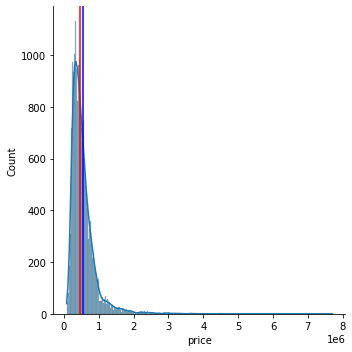

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]

sns.displot(select_df['price'], kde=True); # Price의 확률밀도함수
plt.axvline(select_df['price'].mean(), color='blue') #평균값
plt.axvline(select_df['price'].median(), color='red') #중간값

### 2) 

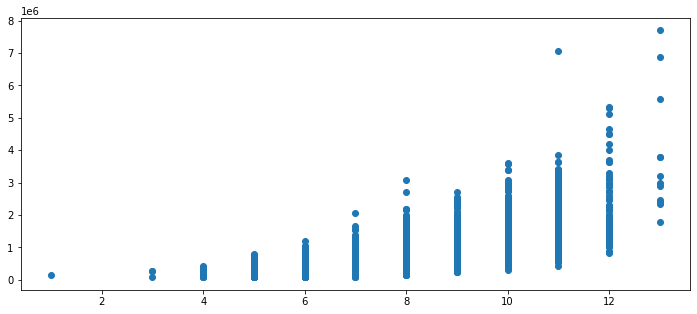

In [ ]:
# grade를 x축, price를 y축으로 scatter plot 시각화
plt.scatter(df['grade'], df['price']);

In [ ]:
predict

540088.1417665294

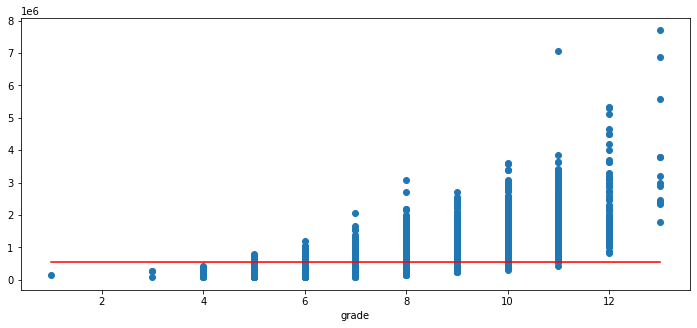

In [ ]:
# 기준모델 시각화
x = df['grade']
predict = df['price'].mean()

plt.scatter(df['grade'], df['price']);
sns.lineplot(x=x, y=predict, color='red')

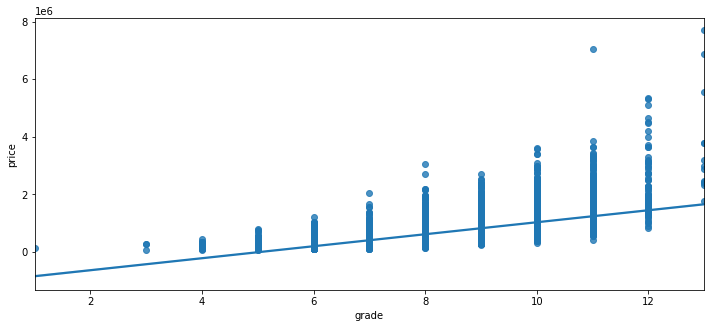

In [ ]:
# 선형회귀모델 시각화
sns.regplot(x=df['grade'], y=df['price']);

### 3)

In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
## X 특성들의 테이블과, y 타겟 벡터를 만듭니다
feature = ['grade']
target = ['price']
X_train = df[feature]
y_train = df[target]

In [ ]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
X_test = [[6]]
y_pred = model.predict(X_test)

print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

6 grade를 가지는 주택의 예상 가격은 $194700 입니다.


In [ ]:
for i in range(15):
    X_test = [[i]]
    y_pred = model.predict(X_test)
    print(f'{X_test[0][0]} grade를 가지는 주택의 예상 가격은 ${int(y_pred)} 입니다.')

0 grade를 가지는 주택의 예상 가격은 $-1056044 입니다.
1 grade를 가지는 주택의 예상 가격은 $-847587 입니다.
2 grade를 가지는 주택의 예상 가격은 $-639129 입니다.
3 grade를 가지는 주택의 예상 가격은 $-430672 입니다.
4 grade를 가지는 주택의 예상 가격은 $-222214 입니다.
5 grade를 가지는 주택의 예상 가격은 $-13757 입니다.
6 grade를 가지는 주택의 예상 가격은 $194700 입니다.
7 grade를 가지는 주택의 예상 가격은 $403157 입니다.
8 grade를 가지는 주택의 예상 가격은 $611615 입니다.
9 grade를 가지는 주택의 예상 가격은 $820073 입니다.
10 grade를 가지는 주택의 예상 가격은 $1028530 입니다.
11 grade를 가지는 주택의 예상 가격은 $1236988 입니다.
12 grade를 가지는 주택의 예상 가격은 $1445445 입니다.
13 grade를 가지는 주택의 예상 가격은 $1653903 입니다.
14 grade를 가지는 주택의 예상 가격은 $1862360 입니다.


In [ ]:
from ipywidgets import interact

@interact
def explain_prediction(sqft=(1,15)):
    y_pred = model.predict([[sqft]])
    pred = f"{int(sqft)} sqft 주택 가격 예측: ${int(y_pred[0])} (1 sqft당 추가금: ${int(model.coef_[0])})"

    return pred


interactive(children=(IntSlider(value=8, description='sqft', max=15, min=1), Output()), _dom_classes=('widget-…

### 4)

In [ ]:
# grade 회귀 계수
model.coef_

array([[208457.56245838]])

In [ ]:
# grade 절편
model.intercept_

array([-1056044.97700977])

### 5)

In [ ]:
model1 = LinearRegression()

feature = ['sqft_living']
target = ['price']
X_train = df[feature]
y_train = df[target]

model1.fit(X_train, y_train)

model1.coef_,model1.intercept_

(array([[280.6235679]]), array([-43580.74309447]))

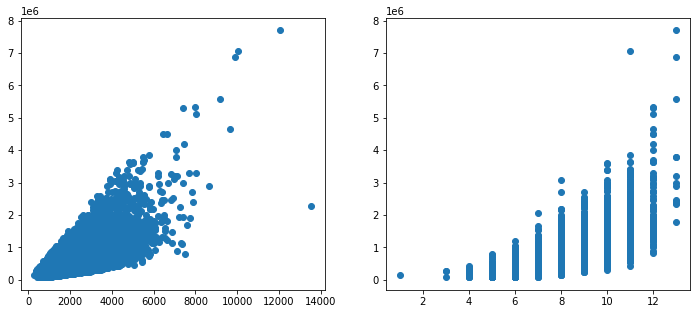

In [ ]:
# grade를 x축, price를 y축으로 scatter plot 시각화
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [12, 5]

plt.subplot(1, 2, 1)
plt.scatter(df['sqft_living'], df['price']);
plt.subplot(1, 2, 2)
plt.scatter(df['grade'], df['price']);

Text(0.5, 1.0, 'grade')

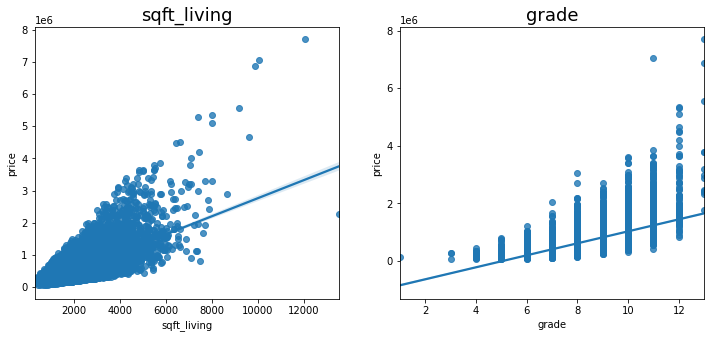

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]

plt.subplot(1, 2, 1)
sns.regplot(x=df['sqft_living'], y=df['price']);
plt.title('sqft_living', fontsize=18)

plt.subplot(1, 2, 2)
sns.regplot(x=df['grade'], y=df['price']);
plt.title('grade', fontsize=18)

In [ ]:
# 과제 데이터를 활용한 단순 코드 실습
import statsmodels.api as sm;

# 독립변수 : 'sqft_living' 종속변수 : 'price'
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'sqft_living']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:35:27   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 과제 데이터를 활용한 단순 코드 실습
import statsmodels.api as sm;

# 독립변수 : 'grade' 종속변수 : 'price'
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'grade']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                 1.736e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:35:50   Log-Likelihood:            -3.0123e+05
No. Observations:               21613   AIC:                         6.025e+05
Df Residuals:                   21611   BIC:                         6.025e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -1.056e+06   1.23e+04    -86.166      0.000   -1.08e+06   -1.03e+06
grade       2.085e+05   1582.103    131.760      0.000    2.05e+05    2.12e+05
==============================================================================
Omnibus:                    19920.375   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          2053087.758
Skew:                           4.090   Prob(JB):                         0.00
Kurtosis:                      50.042   Cond. No.                         51.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

두 칼럼(grade,sqft_living)에 대한 결정계수(R-squared)를 비교해 보았을 때   
- sqft_living(R-squared) : 0.493
- grade(R-squared) : 0.445
이러한 결과가 나오고 sqft_living의 R-squared가 0.493으로 grade보다 높기 때문에 sqft_living가 grade보다 price에 대해 더 높은 설명을 한다(상관관계가 더 높다).

## 🔥

# 도전과제 풀이
## 회귀분석
회귀분석은 독립변수가 종속변수에 영향을 미치는지 알아보고자 할 때 실시하는 분석방법

## 단순선형 회귀모델을 만들기 위한 좋은 특성
단순선형 회귀분석은 하나의 독립변수 X에 대하여 종속변수 Y들 사이의 관계를 수학적 모형을 이용하여 규명하는 것
이렇게 규명된 함수식을 이용하여 설명 변수들의 변화로부터 종속변수의 변화를 예측하는 분석
이 때 표준오차는 추정 값이며 신뢰구간은 정해지는 값이다.

### 단순선형회귀모델을 만들기 위해 고려해야하는 가정
- 선형성 / 비선형성 
 - 여기서 선형이냐 비선형이냐를 결정하는 대상은 '변수'가 아니라 '회귀계수'이다.
- 변수 개수 
 - 단순선형회귀분석은 독립변수와 종속변수가 하나인것만 생각함
 - 독립변수가 여러개인 경우는 '다중선형회귀모델'을 이용
- 오차항의 확률분포가 정규분포를 따르는 지 확인
- 오차항에 자기 상관성이 있는 경우
- 데이터에 아웃라이어가 없어야 함
 - 아웃라이어가 있으면 다른방법을 사용

# OLS(Ordinary Least Square)에 대한 이해

최소자승법_OLS(Ordinary Least Square)은 가장 기본적인 결정론적 회귀방법으로 잔차제곱합(RRS)를 최소화하는 가중치 벡터를 행렬 미분으로 구하는 방법
쉽게 말하면 잔차 제곱의 합을 최소로 하는 방법이 최소자승법이며, 최소자승법을 활용하여 선을 그리면 데이터를 가장 잘 표현하는 선형 회귀선을 그릴 수 있다.  
선형 회귀식은 y = α + βX 이다.   
(y=종속 변수, α=y절편(intercept), β=회귀계수) 

In [ ]:
# 과제 데이터를 활용한 단순 코드 실습
import statsmodels.api as sm;

# 독립변수 : 'sqft_living' 종속변수 : 'price'
df['intercept'] = 1
lm = sm.OLS(df['price'], df[['intercept', 'sqft_living']])
results = lm.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.100e+04
Date:                Tue, 08 Jun 2021   Prob (F-statistic):               0.00
Time:                        05:35:15   Log-Likelihood:            -3.0027e+05
No. Observations:               21613   AIC:                         6.005e+05
Df Residuals:                   21611   BIC:                         6.006e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept   -4.358e+04   4402.690     -9.899      0.000   -5.22e+04    -3.5e+04
sqft_living   280.6236      1.936    144.920      0.000     276.828     284.419
==============================================================================
Omnibus:                    14832.490   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           546444.713
Skew:                           2.824   Prob(JB):                         0.00
Kurtosis:                      26.977   Cond. No.                     5.63e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

intercept의 coef는 -4.358e+04이고 α=-4.358e+04라는 뜻입니다.  
sqft_living의 coef는 280.6236입니다. 즉, β=280.6236입니다.  
선형 회귀식 : y = -4.358e+04 + 281X  
sqft_living이 1증가할 때마다 price가 -4.358e+04만큼 증가한다.  
(이게 정확한 결과인지는 모르겟습니다..)

In [ ]:
import plotly.express as px

px.scatter(df, x = 'sqft_living', y = 'price', opacity=0.65, 
           trendline='ols', trendline_color_override='red')


위 그림에서 빨간 선이 OLS를 따르는 직선이다.

우리의 예측값을 이은 선과 같다.